In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np
import random as rand
from tqdm import tqdm
import random as rand

# Visualizaciones
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree

import sys
import os

# Agregar la carpeta 'src' al sys.path
src_path = os.path.abspath("../src")
if src_path not in sys.path:
    sys.path.append(src_path)
    import support_DecisionTreeRegressor as sp

# Para realizar la regresión lineal y la evaluación del modelo
# -----------------------------------------------------------------------
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [2]:
#Lectura de csv
df = pd.read_csv("../data/df_te.csv")
df.sample(5)

,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,fuelType,brand,notRepairedDamage,powerCV_robust,kilometer_robust
43165,5722.744529,5722.69042,1990.0,5721.515220,12585.761184,5236.859483,4654.329823,8454.021359,5845.373382,2369.921733,0.362319,0.0
334139,5722.744529,5722.69042,2950.0,5723.869135,5212.719911,5236.859483,4654.329823,8454.021359,8229.975718,6707.871077,0.304348,0.0
72667,5722.744529,5722.69042,500.0,5721.515220,2912.480757,4980.449991,3311.581592,4702.257069,5407.374502,3346.962677,0.057971,0.0
171699,5722.744529,5722.69042,13000.0,5723.869135,2912.480757,11654.559866,4654.329823,4702.257069,8769.608410,6707.871077,-0.405797,-3.2
92724,5722.744529,5722.69042,1750.0,5721.515220,5212.719911,11654.559866,4654.329823,4702.257069,5407.374502,6707.871077,-0.050725,0.0


In [3]:
# Creacion de x (variables explicativas) e y (variable respuesta)
x=df.drop("price",axis=1)
y=df[["price"]]
x_train, x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=42)

In [4]:
# Parámetros a evaluar
params_arbol = {
    'max_depth': [5, 10, 20],
    'min_samples_split': [10, 20],
    'min_samples_leaf': [50, 100, 150],
    'max_leaf_nodes': [30, 40, 50, 60, 70, 100]
}
grid_search_arbol=GridSearchCV(DecisionTreeRegressor(),
                               param_grid=params_arbol,
                               cv=5,
                               scoring="neg_mean_squared_error",
                               n_jobs=-1)

grid_search_arbol.fit(x_train,y_train)
modelo_arbol_final=grid_search_arbol.best_estimator_

In [5]:
y_train_pred=modelo_arbol_final.predict(x_train)
y_test_pred=modelo_arbol_final.predict(x_test)

In [6]:
sp.metricas(y_train, y_train_pred, y_test, y_test_pred)

,r2_score,MAE,MSE,RMSE,RMSE-MAE
Train,0.744800,2072.401500,1.152952e+07,3395.515100,1349.020300
Test,0.733500,2094.071400,1.185488e+07,3443.091700,1349.020300
Diferenceia Train-Test,0.011300,-21.669900,-3.253574e+05,-47.576600,0.000000
Porcentaje diferencia (%),1.540600,-1.045600,-2.822000e+00,-1.401200,0.000000
Media,5719.215700,5719.215700,5.719216e+03,5719.215700,5719.215700
Ratio Media,0.000129,0.364252,2.044372e+03,0.597862,0.235875
Influencia dif media (%),0.000200,0.378900,5.688847e+03,0.831900,0.000000
Mediana,3200.000000,3200.000000,3.200000e+03,3200.000000,3200.000000
Ratio Mediana,0.000231,0.651011,3.653813e+03,1.068532,0.421569
Influencia dif mediana (%),0.000400,0.677200,1.016742e+04,1.486800,0.000000


El modelo tiene un buen rendimiento, con diferencias mínimas entre los conjuntos de entrenamiento y prueba, lo que sugiere una generalización adecuada. Los errores son bajos y consistentes, con una influencia relativa pequeña respecto a la media y la mediana. Aun considero que es posible afinar aún más el modelo para reducir el MSE y el RMSE.

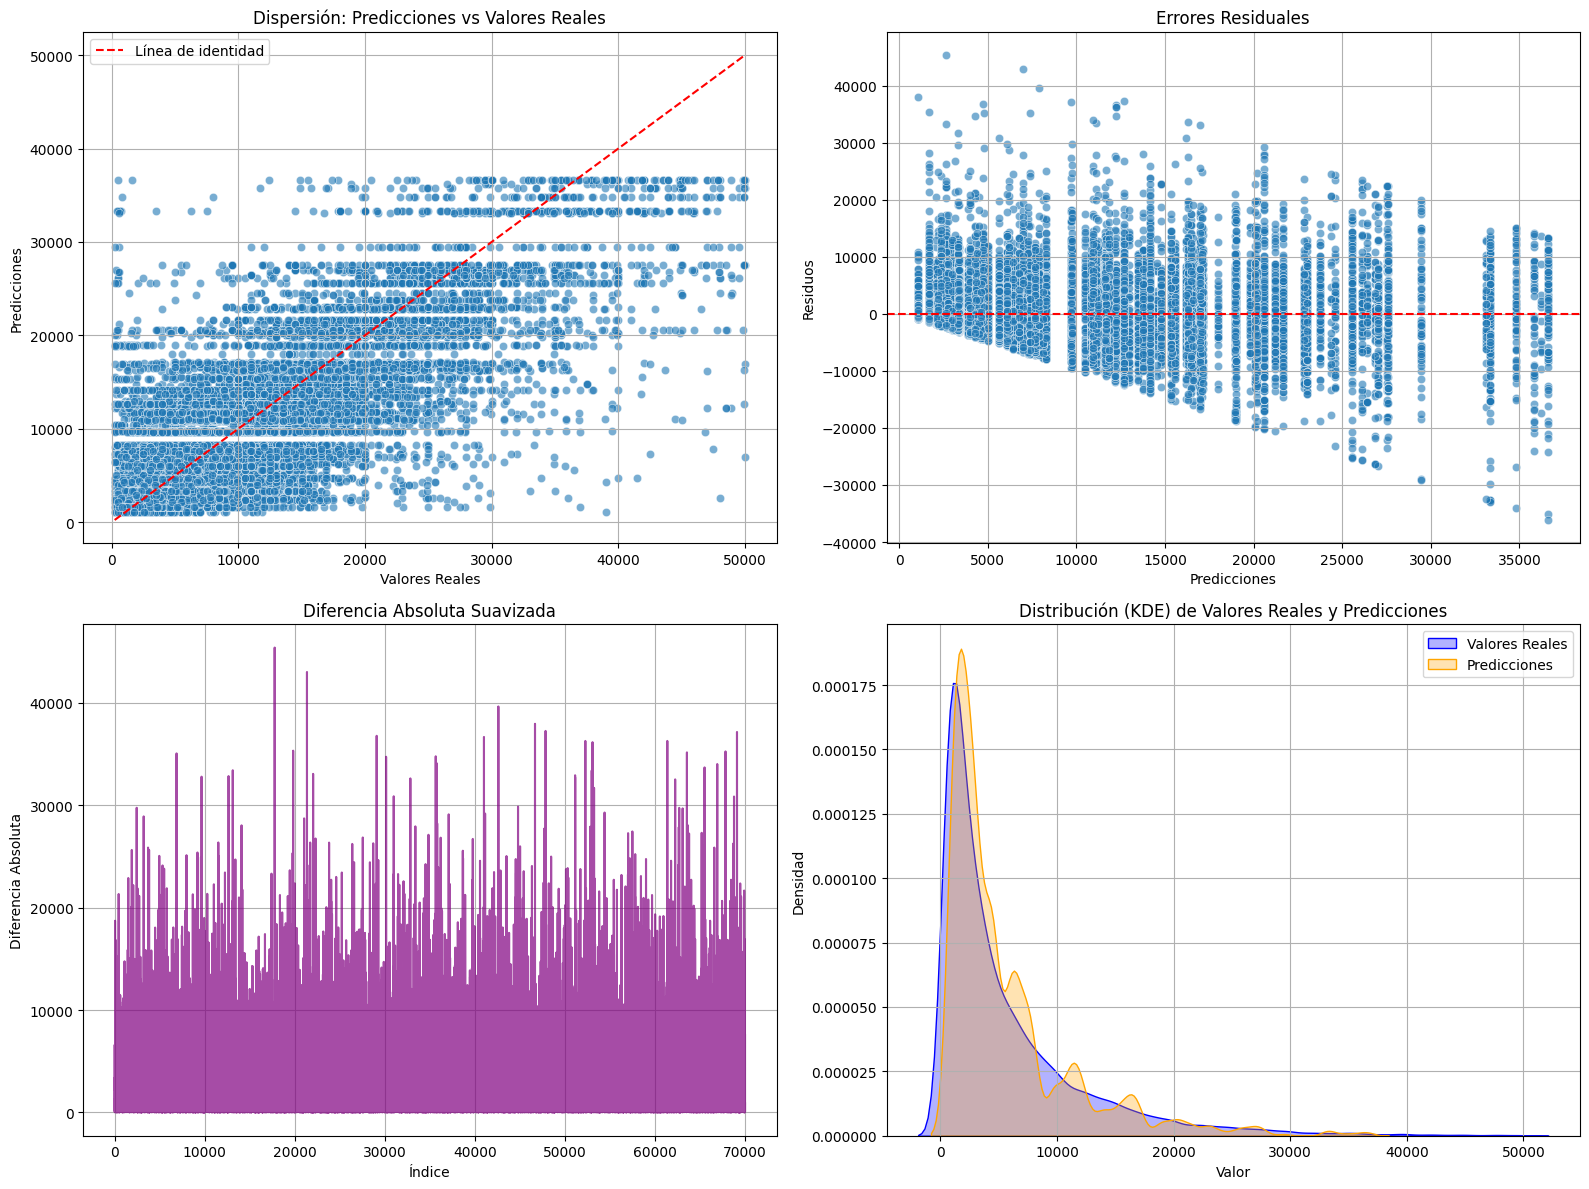

In [7]:
sp.comparativa_graficos(y_test, y_test_pred)

Las visualizaciones muestran que el modelo tiene un rendimiento razonable, con predicciones alineadas en su mayoría con los valores reales (gráfico de dispersión), aunque con cierta dispersión y errores más notorios en valores altos. Los residuos no están distribuidos uniformemente, lo que indica posibles patrones no capturados por el modelo (gráfico de errores residuales). Las diferencias absolutas muestran algunos picos significativos (posibles outliers), mientras que la distribución KDE refleja que las predicciones capturan bien la forma general de los valores reales, pero con ligeras desviaciones en las colas. Esto sugiere que el modelo funciona bien en general, aunque tiene dificultades con casos extremos o complejidad no modelada.

### PROBAMOS A MEJORAR EL MODELO ELIMINANDO VARIABLES CON POCA REPERCUSIÓN

Calculamos la correlación de las variables con "price" para ver cuales pueden ser eliminadas por no ser representativas en el modelo

Correlaciones con 'price':
price                 1.000000
powerCV_robust        0.558097
yearOfRegistration    0.495365
brand                 0.377761
vehicleType           0.340023
gearbox               0.330771
fuelType              0.275689
notRepairedDamage     0.245723
offerType             0.001745
seller                0.000614
abtest                0.000175
kilometer_robust     -0.444155
Name: price, dtype: float64


c:\Users\alexc\Desktop\GIT\8.Regression_model\src\support_DecisionTreeRegressor.py:194: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_with_target.index, y=correlation_with_target.values, palette="viridis")


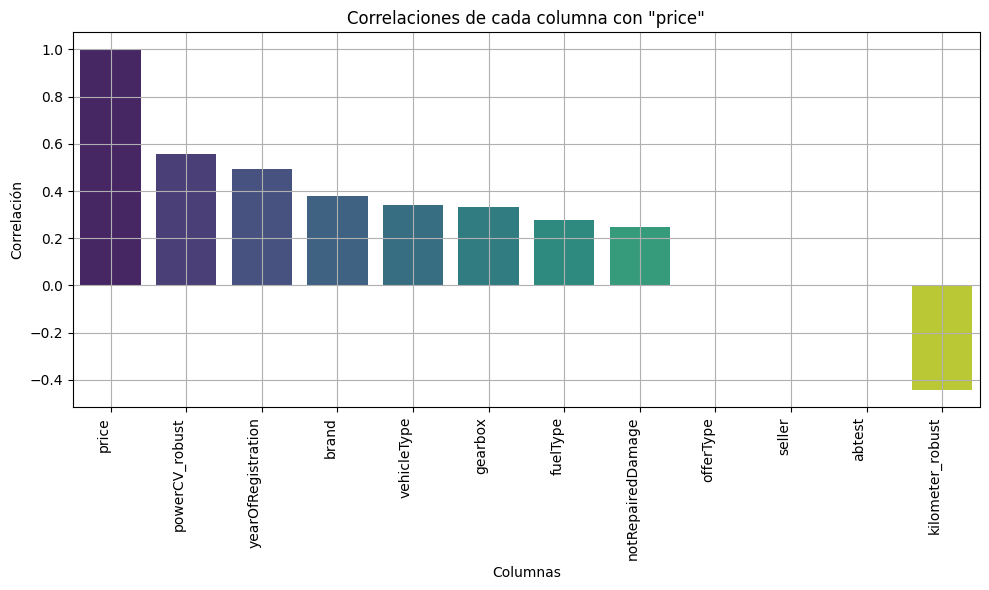


Columnas con baja correlación (abs < 0.05):
['offerType', 'seller', 'abtest']


['offerType', 'seller', 'abtest']

In [8]:
sp.analizar_correlaciones(df, "price", threshold=0.05)

In [9]:
# Excluir columnas irrelevantes según el análisis previo
columns_to_exclude = ['seller', 'offerType', 'abtest']
df_filtered = df.drop(columns=columns_to_exclude)

In [10]:
# Definir las características (X) y la variable objetivo (y)
x2 = df_filtered.drop(columns=['price'])
y2 = df_filtered['price']

# Dividir los datos en conjuntos de entrenamiento y prueba
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size=0.2, random_state=42)

In [11]:
# Grid de hiperparámetros enfocado en regularización
param_grid = {
    'max_depth': [5, 7, 10],          # Reducir profundidad máxima
    'min_samples_split': [20, 50, 100],  # Aumentar muestras mínimas para dividir
    'min_samples_leaf': [10, 20, 50],    # Aumentar tamaño mínimo de nodos hoja
}

# Configurar GridSearchCV
model = GridSearchCV(
    estimator=DecisionTreeRegressor(random_state=42),
    param_grid=param_grid,
    cv=5,  # Validación cruzada
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

# Entrenar el modelo
model.fit(x_train2, y_train2)

# Predecir en los datos de prueba
y_pred_test2 = model.predict(x_test2)
y_pred_train2 = model.predict(x_train2)

C:\Users\alexc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [12]:
sp.metricas(y_train2, y_pred_train2, y_test2, y_pred_test2)

,r2_score,MAE,MSE,RMSE,RMSE-MAE
Train,0.797300,1812.647300,9.158143e+06,3026.242400,1280.855100
Test,0.778400,1859.082700,9.859209e+06,3139.937800,1280.855100
Diferenceia Train-Test,0.018900,-46.435400,-7.010660e+05,-113.695400,0.000000
Porcentaje diferencia (%),2.428100,-2.561700,-7.655100e+00,-3.757000,0.000000
Media,5719.215700,5719.215700,5.719216e+03,5719.215700,5719.215700
Ratio Media,0.000138,0.320999,1.662584e+03,0.539076,0.223956
Influencia dif media (%),0.000300,0.811900,1.225808e+04,1.988000,0.000000
Mediana,3200.000000,3200.000000,3.200000e+03,3200.000000,3200.000000
Ratio Mediana,0.000246,0.573708,2.971461e+03,0.963466,0.400267
Influencia dif mediana (%),0.000600,1.451100,2.190831e+04,3.553000,0.000000


Las métricas indican una mejora del rendimiento del modelo con diferencias mínimas entre los conjuntos de entrenamiento y prueba, lo que sugiere una buena generalización. El r2_score es alto tanto en entrenamiento (0.7973) como en prueba (0.7784), con una diferencia del 2.43%, lo que muestra un modelo bien ajustado. Los errores promedio (MAE, MSE, RMSE) son consistentes entre ambos conjuntos, y las diferencias porcentuales son pequeñas (menos del 4% en todos los casos). La influencia relativa de los errores respecto a la media y mediana es baja, destacando un modelo estable y sin grandes desviaciones. En general, el modelo es sólido y balanceado, pero podría optimizarse aún más para reducir las pequeñas diferencias entre conjuntos.

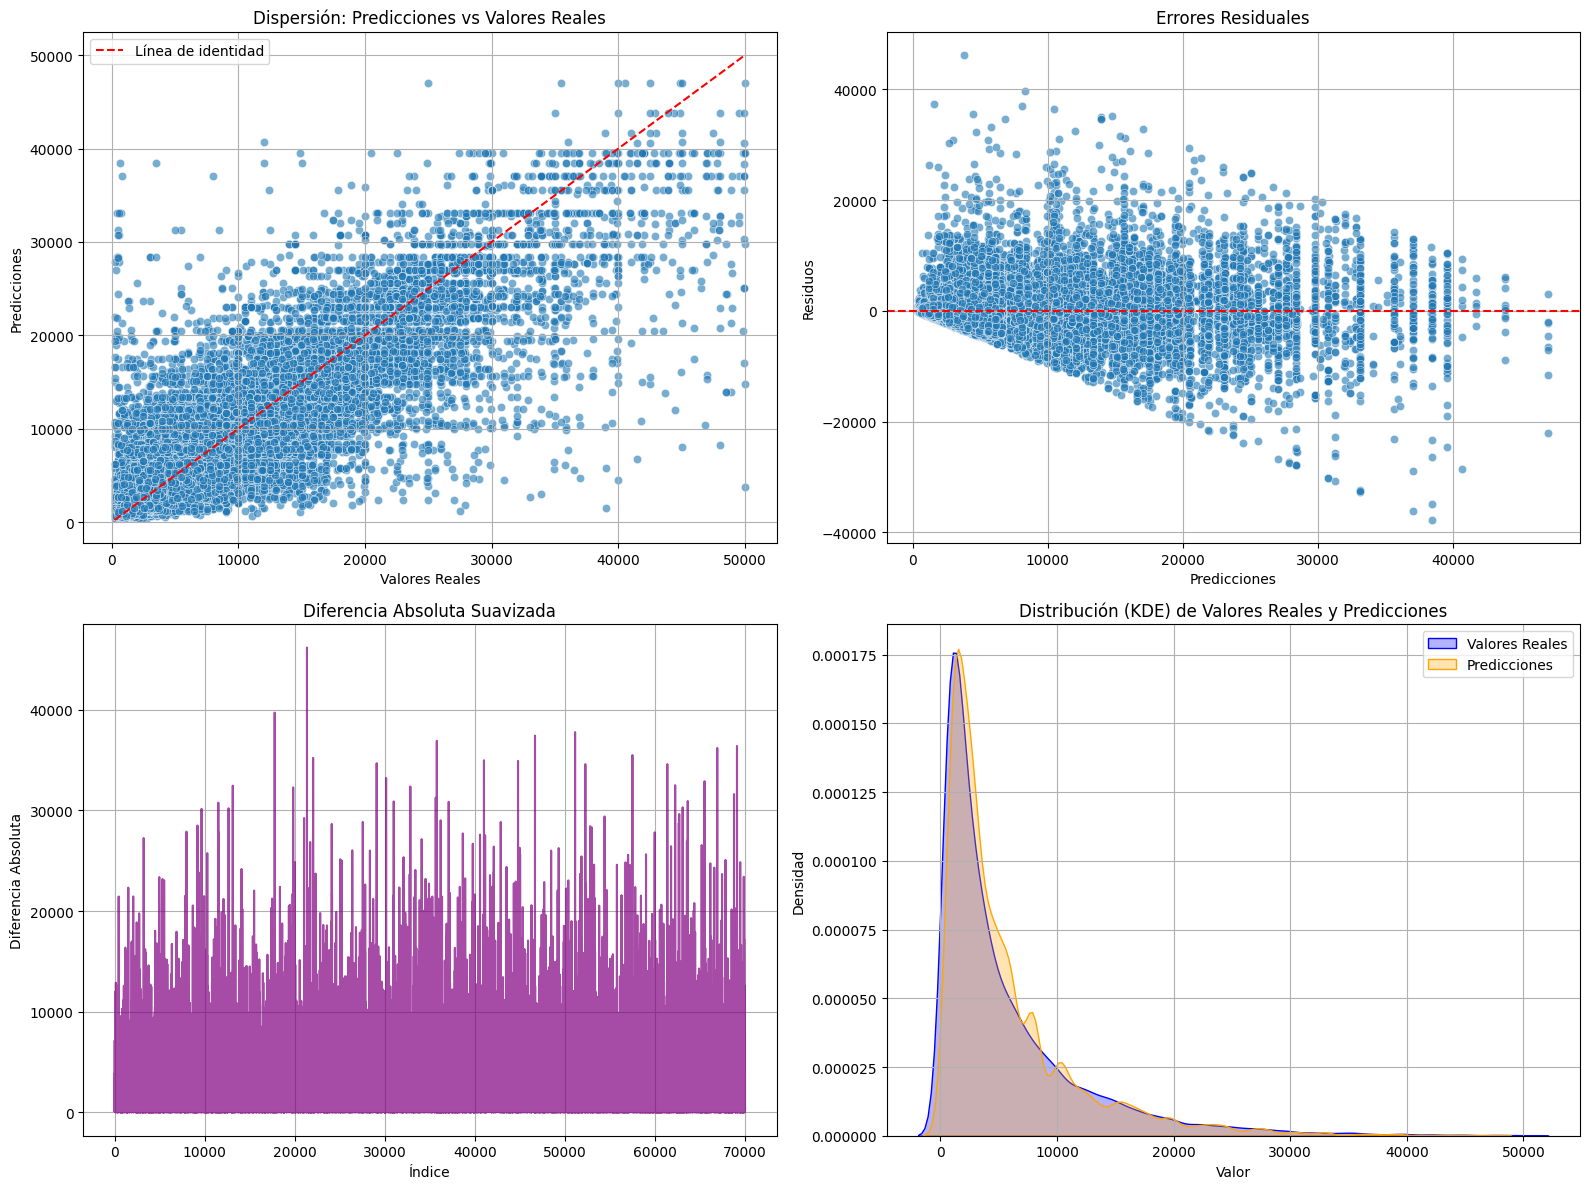

In [13]:
sp.comparativa_graficos( y_test2, y_pred_test2)

El modelo funciona bastante bien en general, ya que las predicciones están bastante alineadas con los valores reales. Sin embargo, hay algunos errores más grandes en los valores altos, lo que sugiere que le cuesta ser preciso en casos más extremos. También se observan algunos patrones en los errores, lo que podría significar que no está capturando toda la complejidad de los datos. Además, hay outliers donde el error es más notable. A pesar de esto, en términos generales, el modelo refleja bien la distribución de los datos, pero con margen para afinarlo y hacerlo más robusto frente a valores extremos.

In [ ]:
# Definir el grid de parámetros
params_arbol = {
    'max_depth': [5, 10, 20, 30, None],  # Explorar profundidad fija y sin límite
    'min_samples_split': [2, 10, 20, 50],  # Divisiones con más o menos datos
    'min_samples_leaf': [1, 5, 10, 20],  # Nodos hoja con diferentes tamaños mínimos
    'max_leaf_nodes': [None, 20, 30, 50, 100],  # Limitar o no el número de nodos hoja
}

# Configurar GridSearchCV
model2 = GridSearchCV(
    DecisionTreeRegressor(random_state=42),
    param_grid=params_arbol,
    cv=5,
    scoring="neg_mean_squared_error",
    n_jobs=-1
)

# Entrenar el modelo con GridSearchCV
model2.fit(x_train2, y_train2)

# Mostrar los mejores parámetros y el error asociado
best_params = model2.best_params_

print(f"Mejores parámetros: {best_params}")

In [ ]:
y_pred_test3 = model2.predict(x_test2)
y_pred_train3 = model2.predict(x_train2)
sp.metricas(y_train2, y_pred_train3, y_test2, y_pred_test3)

El modelo muestra un buen desempeño general, pero hay señales de que está ajustado de más al conjunto de entrenamiento, ya que funciona mejor ahí que en el conjunto de prueba. Aunque el error promedio (MAE) es estable, los errores más grandes (MSE y RMSE) en el conjunto de prueba indican que el modelo podría estar siendo afectado por valores extremos. Además, las diferencias entre los dos conjuntos, aunque no son alarmantes, sugieren que se podría trabajar en mejorar la generalización del modelo, quizás ajustando la complejidad, manejando outliers o aplicando regularización para hacerlo más robusto.

In [ ]:
sp.comparativa_graficos( y_test2, y_pred_test3)

El modelo tiene un buen desempeño en general, pero hay señales de que podría ajustarse mejor para manejar valores extremos y reducir patrones en los errores. Vamos a tratar de manejar los outliers para ayudar a mejorar su precisión y robustez.

### PRUEBA DE MODELO LIMPIANDO DATOS CON PRECIOS OUTIERS

#### Ahora vamos a tratar de mejorar el modelo por última vez eliminando precios muy extremos que podemos calificar como outiers que generan ruido en el modelo

In [ ]:
# Cálculo del rango intercuartílico (IQR)
q1 = df['price'].quantile(0.25)  # Primer cuartil
q3 = df['price'].quantile(0.75)  # Tercer cuartil
iqr = q3 - q1

# Definir límites para identificar outliers (tanto superiores como inferiores)
lower_bound = q1 - 1 * iqr
upper_bound = q3 + 1.5 * iqr

# Filtrar los outliers superiores e inferiores
outliers_superiores = df[df['price'] > upper_bound]
outliers_inferiores = df[df['price'] < lower_bound]

# Visualizar los resultados
plt.figure(figsize=(14, 6))

# Gráfico de dispersión mostrando los valores y los outliers
plt.subplot(1, 2, 1)
plt.scatter(range(len(df)), df['price'], alpha=0.6, label='Datos')
plt.scatter(outliers_superiores.index, outliers_superiores['price'], color='red', label='Outliers Superiores', alpha=0.8)
plt.scatter(outliers_inferiores.index, outliers_inferiores['price'], color='purple', label='Outliers Inferiores', alpha=0.8)
plt.axhline(upper_bound, color='red', linestyle='--', label=f'Límite Superior ({upper_bound:.2f})')
plt.axhline(lower_bound, color='purple', linestyle='--', label=f'Límite Inferior ({lower_bound:.2f})')
plt.title('Gráfico de Dispersión con Outliers')
plt.xlabel('Índice')
plt.ylabel('Price')
plt.legend()

# Histograma resaltando los outliers
plt.subplot(1, 2, 2)
sns.histplot(df['price'], bins=30, kde=True, color='lightblue')
plt.axvline(upper_bound, color='red', linestyle='--', label=f'Límite Superior ({upper_bound:.2f})')
plt.axvline(lower_bound, color='purple', linestyle='--', label=f'Límite Inferior ({lower_bound:.2f})')
plt.title('Histograma con Límites para Outliers')
plt.legend()

plt.tight_layout()
plt.show()

# Mostrar información sobre los outliers
print("Valores considerados outliers superiores:")
display(outliers_superiores)

print("\nValores considerados outliers inferiores:")
display(outliers_inferiores)

print(f"\nUmbral superior para considerar outliers: {upper_bound:.2f}")
print(f"Umbral inferior para considerar outliers: {lower_bound:.2f}")


In [ ]:
# Ver valores atipicos de "price"
limite_inferior = 300
limite_superior = upper_bound

df_filtered_copy=df_filtered.copy()

# Filtro los valores fuera de rango
valores_fuera_rango = df_filtered_copy[(df_filtered_copy['price'] < limite_inferior) | (df_filtered_copy['price'] > limite_superior)]

# Reemplazo los valores fuera de rango por NaN
df_filtered_copy.loc[df_filtered_copy['price'] < limite_inferior, 'price'] = np.nan
df_filtered_copy.loc[df_filtered_copy['price'] > limite_superior, 'price'] = np.nan

# Elimino las filas con NaN en la columna 'price' en el DataFrame original
df_filtered2 = df_filtered_copy.dropna(subset=['price'])

# Ver la forma del DataFrame con valores fuera de rango
print(df_filtered.shape)
print(valores_fuera_rango.shape)
print(df_filtered2.shape)

In [ ]:
# Definir las características (X) y la variable objetivo (y)
x3 = df_filtered2.drop(columns=['price','gearbox'])
y3 = df_filtered2['price']

# Dividir los datos en conjuntos de entrenamiento y prueba
x_train3, x_test3, y_train3, y_test3 = train_test_split(x3, y3, test_size=0.2, random_state=42)

In [ ]:
# Reducir el rango de hiperparámetros para optimizar el procesamiento
param_grid = {
    'max_depth': [5, 10, 20, 30, None],  # Explorar profundidad fija y sin límite
    'min_samples_split': [2, 10, 20, 50],  # Divisiones con más o menos datos
    'min_samples_leaf': [1, 5, 10, 20],  # Nodos hoja con diferentes tamaños mínimos
    'max_leaf_nodes': [None, 20, 30, 50, 100],  # Limitar o no el número de nodos hoja 
}

# Configurar GridSearchCV
model2 = GridSearchCV(
    estimator=DecisionTreeRegressor(random_state=42),
    param_grid=param_grid,
    cv=10,  
    scoring='neg_mean_squared_error',
    n_jobs=-1, 
)

# Entrenar el modelo
model2.fit(x_train3, y_train3)

# Predecir en los datos de prueba
y_pred_test4 = model2.predict(x_test3)
y_pred_train4 = model2.predict(x_train3)

In [ ]:
sp.metricas(y_train3, y_pred_train4, y_test3, y_pred_test4)

In [ ]:
sp.comparativa_graficos( y_test3, y_pred_test4)

#### COMPARATIVA DE METRICAS

1º modelo sin modificaciones

In [ ]:
sp.metricas(y_train, y_train_pred, y_test, y_test_pred)

2º modelo retirando variables que no teinan correlacion con el la variable explicada 'price'

In [ ]:
sp.metricas(y_train2, y_pred_train2, y_test2, y_pred_test2)

3º modelo usando el modelo anterior pero iterando con otro parametros

In [ ]:
sp.metricas(y_train2, y_pred_train3, y_test2, y_pred_test3)

4º modelo usando el 3º modelo, pero retirando valores outiers de la variable explicada

In [ ]:
sp.metricas(y_train3, y_pred_train4, y_test3, y_pred_test4)